Price,Close,High,Low,Open,Volume,MA200,MA50,Strategy200,Strategy50,asset_cumulative200,strategy_cumulative200,asset_cumulative50,strategy_cumulative50
Date,,,,,,,,,,,,,
1993-11-11,26.050589,26.191023,26.033034,26.120806,88900,25.163893,25.959080,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-12,26.173452,26.261224,26.085681,26.103235,108200,25.173553,25.965112,1.0,1.0,0.004716,0.004716,0.004716,0.004716
1993-11-15,26.155901,26.226118,26.085684,26.226118,243300,25.182263,25.970445,1.0,1.0,0.004043,0.004043,0.004043,0.004043
1993-11-16,26.278790,26.296344,26.103247,26.208572,492600,25.191329,25.981724,1.0,1.0,0.008760,0.008760,0.008760,0.008760
1993-11-17,26.138346,26.296334,26.068129,26.296334,39600,25.198400,25.991939,1.0,1.0,0.003369,0.003369,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,692.729980,694.130005,689.919983,690.489990,60473800,634.959032,681.090768,1.0,1.0,25.591721,3.015442,25.591721,-0.575517
2026-01-27,695.489990,696.530029,693.570007,694.179993,55506100,635.717065,681.373235,1.0,1.0,25.697669,3.031441,25.697669,-0.573826
2026-01-28,695.419983,697.840027,693.940002,697.049988,61172200,636.593910,681.880435,1.0,1.0,25.694982,3.031035,25.694982,-0.573869


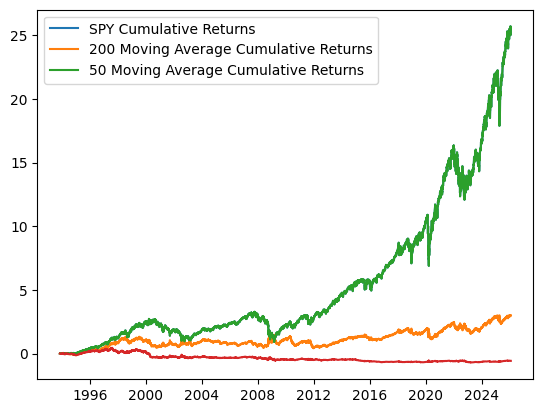

In [22]:
# Imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Variablen
TICKER = 'SPY'
WINDOW_200 = 200
WINDOW_50 = 50

# Funktionen
def get_data():
    # Downloaden der Daten von Tickervariable in eine Dataframe
    df = yf.download(
    TICKER,
    period="max",
    progress=False)
    df.columns = df.columns.get_level_values(0)

    df['MA200'] = df['Close'].rolling(WINDOW_200).mean()
    df['MA50'] = df['Close'].rolling(WINDOW_50).mean()

    return df.dropna()

def add_strategy(df):
    df['Strategy200'] = np.where(df['Close'] > df['MA200'], 1, -1)
    df['Strategy200'] = df['Strategy200'].shift(1)

    df['Strategy50'] = np.where(df['Close'] > df['MA50'], 1, -1)
    df['Strategy50'] = df['Strategy50'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative200'] = np.cumprod(1 + df['Close'].pct_change()) -1
    df['strategy_cumulative200'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy200']) -1

    df['asset_cumulative50'] = np.cumprod(1 + df['Close'].pct_change()) -1
    df['strategy_cumulative50'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy50']) -1

    # plot the returns
    plt.plot(df['asset_cumulative200'])
    plt.plot(df['strategy_cumulative200'])
    plt.plot(df['asset_cumulative50'])
    plt.plot(df['strategy_cumulative50'])

    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW_200} Moving Average Cumulative Returns', f'{WINDOW_50} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)

    return df

main()